# Modelos de regresión

## 1. Importar librerias

In [1]:
#datos
import pandas as pd
import numpy as np

#librerias para modelos de machine learning
from sklearn.model_selection import train_test_split   #divide la data en entrenamiento y prueba
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # metricas del modelo
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
#tuberia
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

#validación
from sklearn.model_selection import KFold, cross_val_score

#visualizacion
import matplotlib.pyplot as plt

# almacenar modelos
import joblib

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

#conectar con drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## 2. Data

### 2.1 abrir data

In [2]:
data_real= pd.read_csv("/content/drive/MyDrive/CODIGOS _ia/ds_salaries.csv")
data_2= pd.read_csv("/content/drive/MyDrive/CODIGOS _ia/dataPreprocesada2_salaries.csv")

### 2.2 Preprocesar data

In [3]:
dummies_currency = pd.get_dummies(data_real["salary_currency"], prefix="salary_currency", drop_first=True).astype(int)
dummies_employ_residence = pd.get_dummies(data_real["employee_residence"], prefix="employ_residence", drop_first=True).astype(int)

data_2 = pd.concat([data_2, dummies_currency,dummies_employ_residence], axis=1)
data_2.shape

(607, 131)

## 3. Seleccionar y partir data

In [4]:
# Seleccionar la variable independiente (X) y la dependiente (y)
X = data_2.drop(columns=['salary_in_usd'])
y = data_2['salary_in_usd']
# random_state se usa para fijar la semilla del generador aleatorio, asegurando que los resultados sean reproducibles.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 4. Aplicar modelos

### 4.1 Árboles de decisión regresores

In [5]:
modelo_arbol = DecisionTreeRegressor(max_depth=5, random_state=42)
modelo_arbol.fit(X_train, y_train)
# Predecir
y_pred_arbol = modelo_arbol.predict(X_test)
# Evaluar
r2_arbol = r2_score(y_test, y_pred_arbol)
mse_arbol = mean_absolute_error(y_test, y_pred_arbol)
rmse_arbol = np.sqrt(mean_squared_error(y_test, y_pred_arbol))
# Calcular la desviación estándar de y_test
std_y_test= y_test.std()
print("R²:", r2_arbol)
print("MAE:", mse_arbol)
print("RMSE:", rmse_arbol)
print("STD:", std_y_test) #ser mas peque RMSE

R²: 0.485773077525266
MAE: 31237.21260696435
RMSE: 44393.80872197924
STD: 62163.038069299255


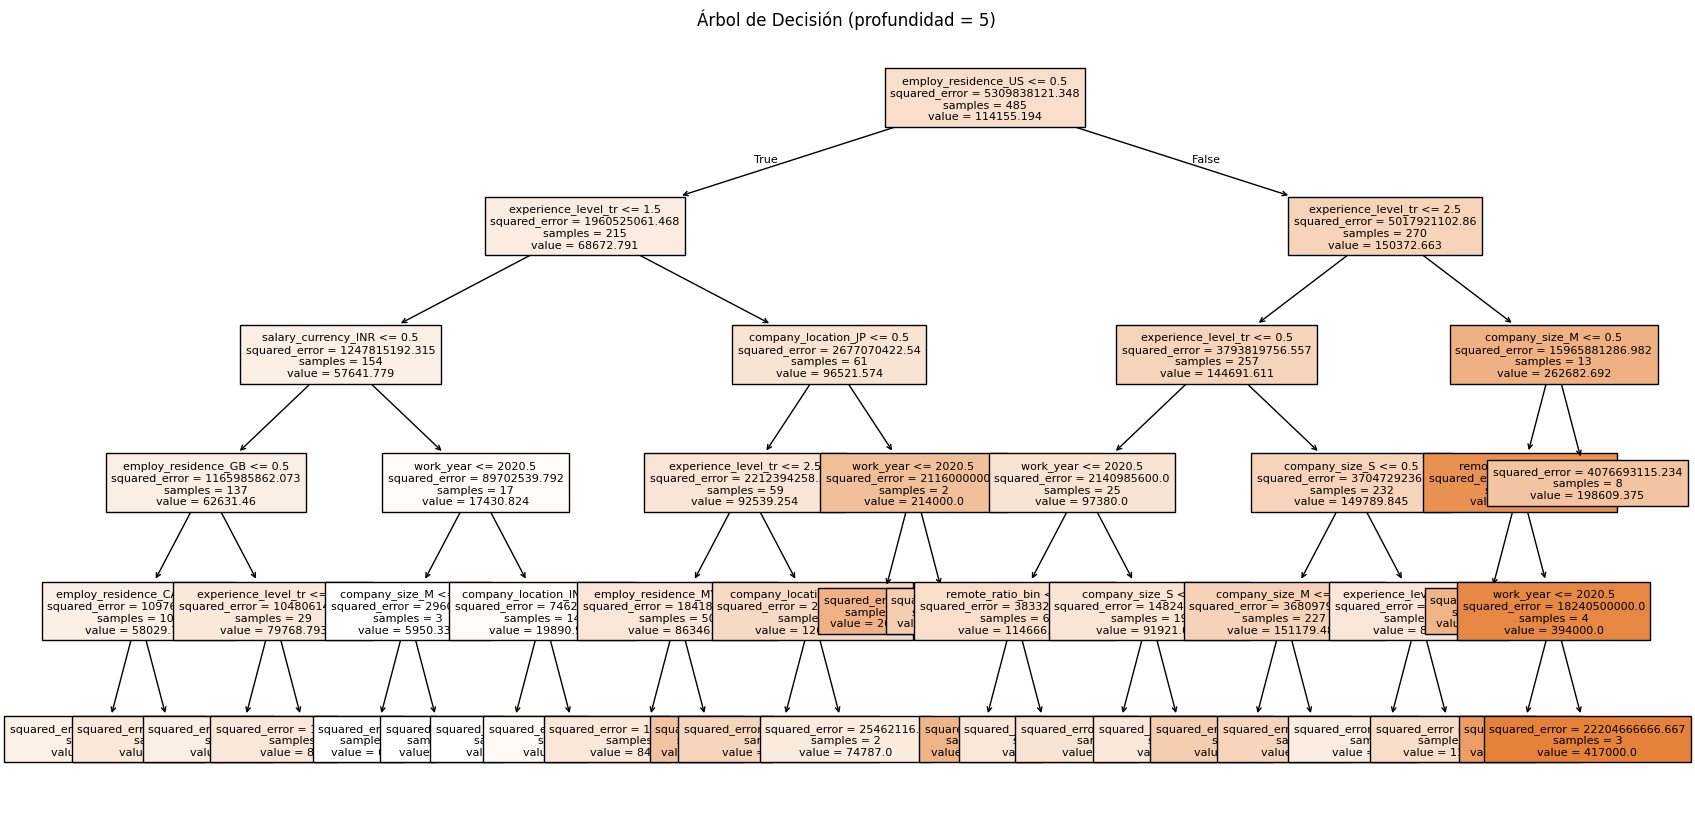

In [6]:
#graficar arbol
plt.figure(figsize=(20, 10))  # Tamaño del gráfico
plot_tree(modelo_arbol,
          filled=True,
          feature_names=X.columns,
          fontsize=8)
plt.title("Árbol de Decisión (profundidad = 5)")
plt.show()

### 4.2 Random Forest regresores

In [9]:
#la data final con outliner
modelo_rf = RandomForestRegressor(n_estimators=50,max_depth=5, min_samples_split=2, random_state=42)

modelo_rf.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = modelo_rf.predict(X_test)

# Evaluar modelos
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
std_y_test= y_test.std()

print("R²:", r2_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)

R²: 0.5298245375106833
MSE: 1801979985.1202729
RMSE: 42449.73480624199


### 4.3 PipeLine y suavizado de Y (logaritmo): Data Scaled y OneHot - CROSS VALIDATION

**PARA TENER EN CUENTA**

#### np.log1p(...)
* Aplica la función logarítmica log(1 + x) a cada valor de la columna.
* Es decir, si un valor de salario es x, se calcula log(1 + x).
* Esto es más seguro que np.log(x), especialmente si hay ceros o valores muy pequeños, ya que evita errores como log(0) (que es indefinido).
#### StandardScaler()
Es una herramienta de preprocesamiento que estandariza variables numéricas, es decir:
Transforma los datos para que cada característica numérica tenga: Media (μ) = 0 Desviación estándar (σ) = 1

la formula aplicada  -> **𝑧 = (𝑥 − 𝜇) / 𝜎**

Donde: x: valor original ---- μ: media de la variable ---- σ: desviación estándar de la variable

🎯 ¿Para qué sirve?
+ Mejora el rendimiento de muchos algoritmos (regresión lineal, SVM, redes neuronales, KNN…).
+ Evita que las variables con mayor escala dominen el modelo.
+ Ayuda a que el algoritmo converja más rápido en procesos iterativos.

📌 Ejemplo:
Supón que tienes una variable edad con valores entre 20 y 60. Después de aplicar StandardScaler(), los valores se transforman en -2 a 2, aproximadamente.

#### CROSS VALIDATION
| Métrica                                                                 | Se calcula sobre...                                        | ¿Para qué sirve?                                           |
| ----------------------------------------------------------------------- | ---------------------------------------------------------- | ---------------------------------------------------------- |
| **R² de prueba** (`r2_score(y_test, y_pred)`)                           | 🔵 **Datos de prueba (`X_test`, `y_test`)**                | Evalúa el desempeño del modelo final.                      |
| **R² de validación cruzada** (`cross_val_score(..., X_train, y_train)`) | 🟢 **Distintas particiones del conjunto de entrenamiento** | Evalúa la estabilidad del modelo durante el entrenamiento. |


In [ ]:
data_real.employee_residence.nunique()

57

R^2 en cada fold: [0.40097661 0.54752342 0.54908309 0.65722124 0.66115458]
R^2 promedio de entremamiento para el modelo Regresión_Lineal: 0.5632
Desviación estándar de R² de CV: 0.0951
R² de Regresión_Lineal en prueba: 63.01%
RMSE de Regresión_Lineal: 0.5100800824150449
_________________________________________________


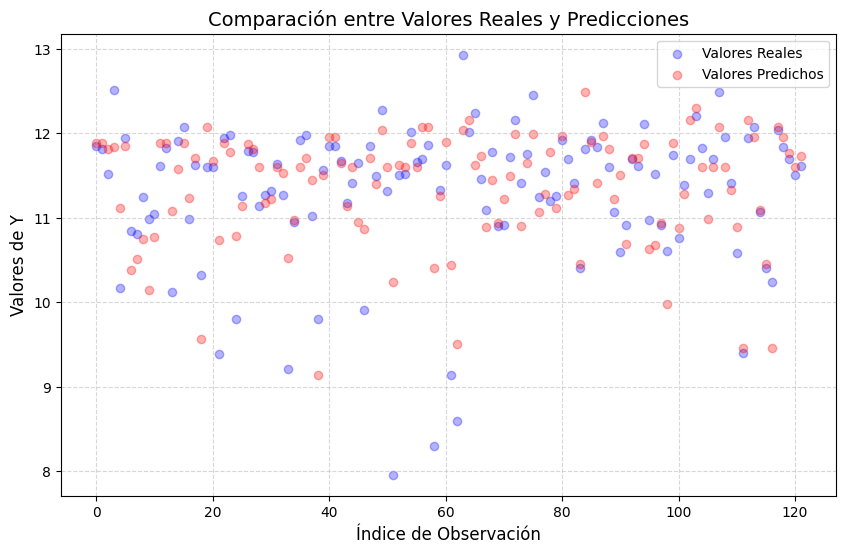

R^2 en cada fold: [0.25037381 0.25719583 0.55260611 0.15875515 0.2404811 ]
R^2 promedio de entremamiento para el modelo Arbol_de_Decisión: 0.2919
Desviación estándar de R² de CV: 0.1351
R² de Arbol_de_Decisión en prueba: 38.81%
RMSE de Arbol_de_Decisión: 0.6559896981145494
_________________________________________________


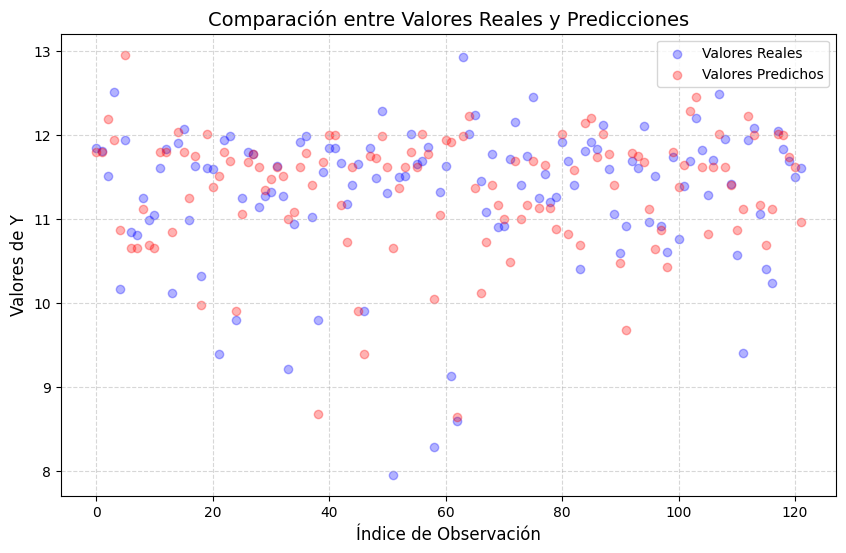

R^2 en cada fold: [0.44828089 0.53001511 0.60924739 0.5479039  0.57624763]
R^2 promedio de entremamiento para el modelo Random_Forest: 0.5423
Desviación estándar de R² de CV: 0.0541
R² de Random_Forest en prueba: 52.07%
RMSE de Random_Forest: 0.5806036984675522
_________________________________________________


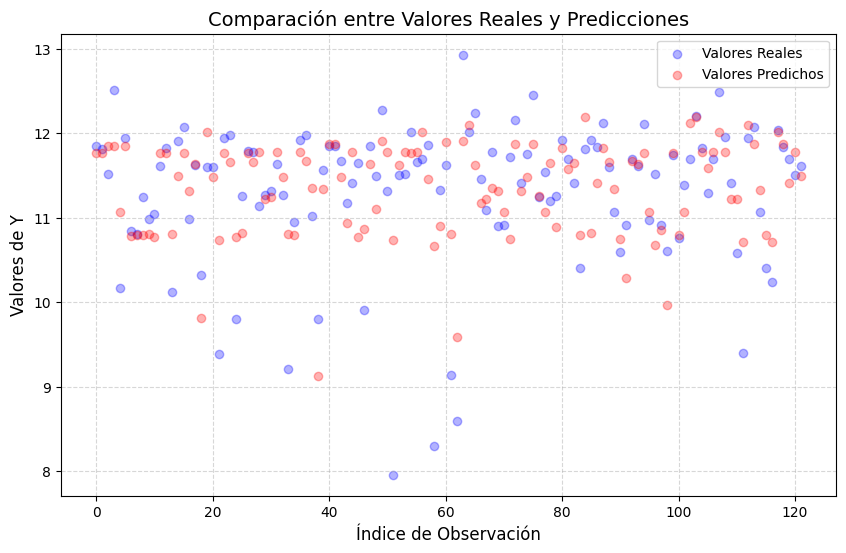

LA DATA QUEDO CON UN TAMAÑO DE  (607, 17)


In [14]:
# Cargar datos (ajusta esta línea si ya tienes tu DataFrame `df`)
df = data_real

df["remote_type"] = df["remote_ratio"].apply(lambda x:"Presencial" if x == 0 else ("Remoto Total" if x == 100 else "Híbrido"))

# Transformar variable objetivo a logarítmica
df["log_salary_usd"] = np.log1p(df["salary_in_usd"])

# Seleccionar variables para X e y
X = df[[
    "work_year", "experience_level", "employment_type",
    "job_title_clean", "salary_currency", "employee_residence_clean",
    "company_location_clean", "company_size", "remote_type"
]]
y = df["log_salary_usd"]

# Variables categóricas y numéricas
cat_cols = [
    "experience_level", "employment_type", "job_title_clean","salary_currency",
    "employee_residence_clean", "company_location_clean", "company_size", "remote_type"
]
num_cols = ["work_year"]

#convertir todas a
for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Preprocesamiento
preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", drop="first"), cat_cols),
    #(StandardScaler(), num_cols)
)

#modelos
modelos={"Regresión_Lineal":LinearRegression(),
         "Arbol_de_Decisión":DecisionTreeRegressor(random_state=42),
         "Random_Forest":RandomForestRegressor(n_estimators=50, max_depth=5,random_state=42) }
# Pipeline
for nombre,modelo in modelos.items():
    #tuberia
    pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    (nombre,modelo)])

    # VALIDACIÓN CRUZADA

    # Definir K-Fold
    k = 5
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Evaluar el modelo con cross-validation
    # En regresión, una métrica común es el R^2 (coeficiente de determinación)
    scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='r2')

    # Resultados CROSS VALIDATION
    print(f"R^2 en cada fold: {scores}")
    print(f"R^2 promedio de entremamiento para el modelo {nombre}: {np.mean(scores):.4f}")
    print(f"Desviación estándar de R² de CV: {scores.std():.4f}")

    # Entrenar modelo
    pipeline.fit(X_train, y_train)

    # Evaluar MODELO
    y_pred = pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    #almacenar Modelo #puede almacenar modelo o tuberia

    joblib.dump(pipeline, "/content/drive/MyDrive/CODIGOS _ia/modelos/"+"/modelo3_"+ nombre+".pkl")


    print(f"R² de {nombre} en prueba: {r2:.2%}")
    print(f"RMSE de {nombre}: {rmse}")
    print("_________________________________________________")

    #graficar

    plt.figure(figsize=(10, 6))

    # Graficar cada punto (valor real vs predicho)
    plt.scatter(range(len(y_test)), y_test, color='blue', label="Valores Reales", alpha=0.3)
    plt.scatter(range(len(y_pred)), y_pred, color='red', label="Valores Predichos", alpha=0.3)

    # Configurar el gráfico
    plt.xlabel("Índice de Observación", fontsize=12)
    plt.ylabel("Valores de Y", fontsize=12)
    plt.title("Comparación entre Valores Reales y Predicciones", fontsize=14)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)

    # Mostrar gráfico
    plt.show()

print("LA DATA QUEDO CON UN TAMAÑO DE " , df.shape)

#almacenar data
df.to_csv("/content/drive/MyDrive/CODIGOS _ia/dataPreprocesada3_salaries.csv")
